# N-Asset Efficient Frontier #

In [20]:
import pandas as pd
import risk_kit as rk
import numpy as np
from scipy.optimize import minimize
%load_ext autoreload
%autoreload 2

ind = rk.get_ind_returns()
er = rk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


```python
def plot_ef(n_points, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
    
    weights = minimize_vol(target_return) ???
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
        })
    return ef.plot.line(x="Volatility", y="Returns", style=style)
```

<AxesSubplot:xlabel='Volatility'>

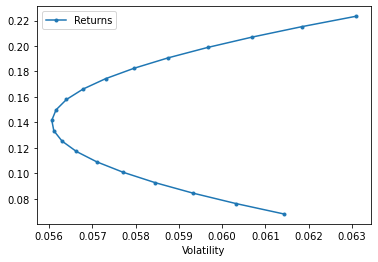

In [4]:
l = ["Games", "Fin"]
rk.plot_ef2(20, er[l], cov.loc[l, l])

In [6]:
def minimize_vol(target_return, er, cov):
    """""
    Target returns to weight vector
    """""
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    return_is_target = {
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - rk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(rk.portfolio_vol, init_guess,
                       args=(cov,), method="SLSQP",
                       options={'disp':False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x

In [13]:
w15 = minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = rk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [8]:
w15

array([0.47287631, 0.52712369])

In [15]:
w15 = rk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = rk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [18]:
def optimal_weights(n_points, er, cov):
    """""
    Generates a lists of weights to run optimizer on to minimize the vol
    """""
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [rk.portfolio_return(w, er) for w in weights]
    vols = [rk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
        })
    return ef.plot.line(x="Volatility", y="Returns", style=style)

<AxesSubplot:xlabel='Volatility'>

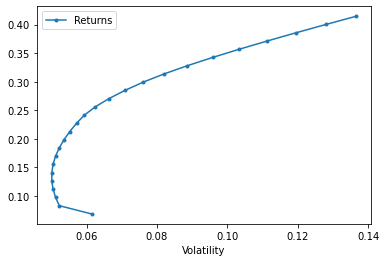

In [19]:
l = ["Smoke", "Fin", "Games", "Coal"]
plot_ef(25, er[l], cov.loc[l,l])

<AxesSubplot:xlabel='Volatility'>

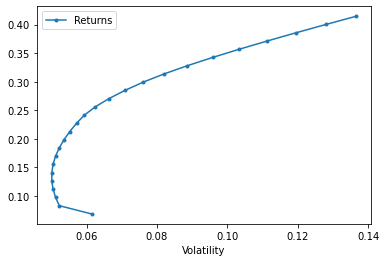

In [21]:
rk.plot_ef(25, er[l], cov.loc[l,l])